In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

C:\Users\sjasm\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sjasm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sjasm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
df_tsla = pdr.get_data_yahoo('TSLA')  #getting data from yahoo finance
df_tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000
2017-11-29,21.200001,20.082001,21.153334,20.502666,131511000.0,20.502666
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000
...,...,...,...,...,...,...
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998
2022-11-18,185.190002,176.550003,185.050003,180.190002,75904900.0,180.190002
2022-11-21,176.770004,167.539993,175.850006,167.869995,92882700.0,167.869995


## Simple Moving Average 

<AxesSubplot:xlabel='Date'>

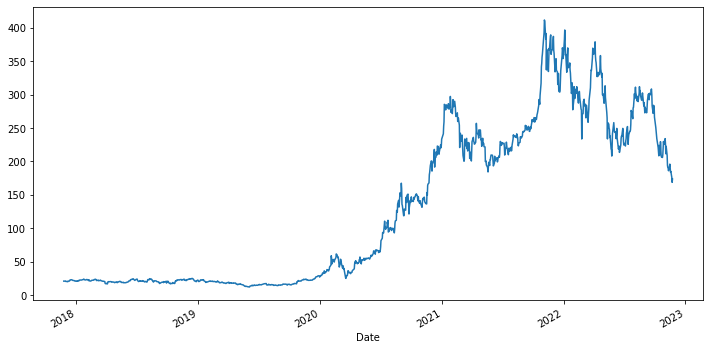

In [4]:
## smoothening 

df_tsla['Open'].plot(figsize = (12,6))

In [5]:
## simple moving average

df_tsla['Open:10 days rolling'] = df_tsla['Open'].rolling(window=10, min_periods=1).mean()

In [7]:
df_tsla.head()

,High,Low,Open,Close,Volume,Adj Close,Open:10 days rolling
Date,,,,,,,
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667,20.919333
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667,20.901333
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000,20.964444
2017-11-29,21.200001,20.082001,21.153334,20.502666,131511000.0,20.502666,21.011667
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000,20.923467


<AxesSubplot:xlabel='Date'>

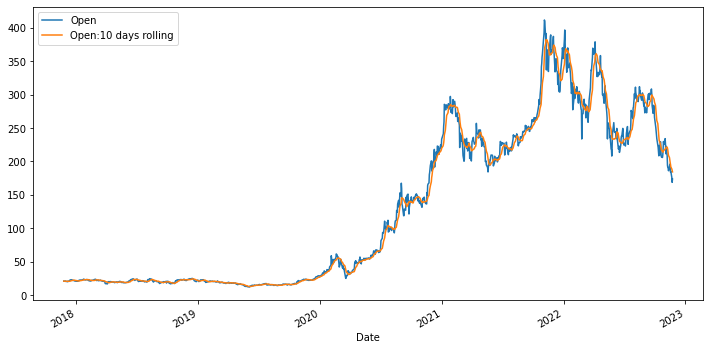

In [8]:
df_tsla[['Open', 'Open:10 days rolling']].plot(figsize = (12,6))

<AxesSubplot:xlabel='Date'>

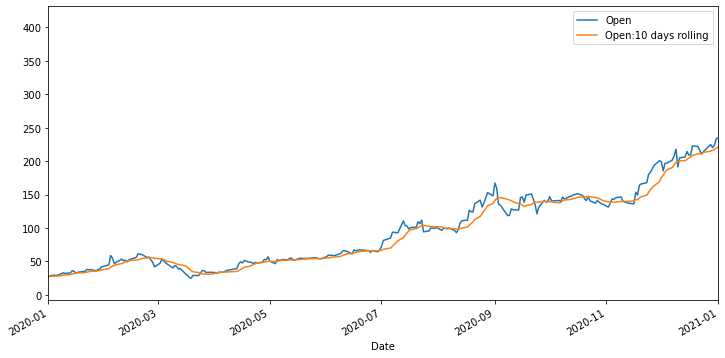

In [9]:
df_tsla[['Open', 'Open:10 days rolling']].plot(xlim = ['2020-01-01', '2021-01-01'],figsize = (12,6))

In [10]:
df_tsla['Open:30 days rolling'] = df_tsla['Open'].rolling(window=30, min_periods=1).mean()
df_tsla['Open:50 days rolling'] = df_tsla['Open'].rolling(window=50, min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

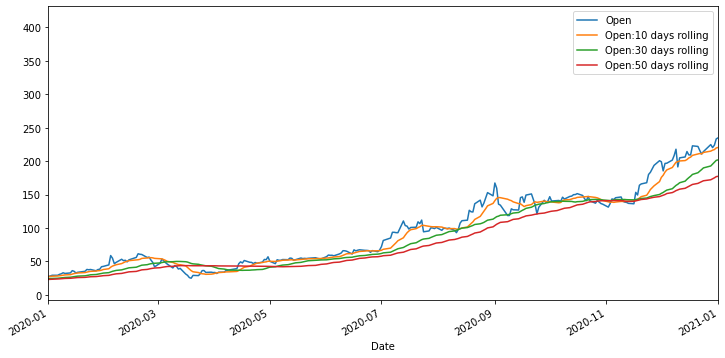

In [11]:
df_tsla[['Open', 'Open:10 days rolling','Open:30 days rolling','Open:50 days rolling' ]].plot(xlim = ['2020-01-01', '2021-01-01'],figsize = (12,6))

<AxesSubplot:xlabel='Date'>

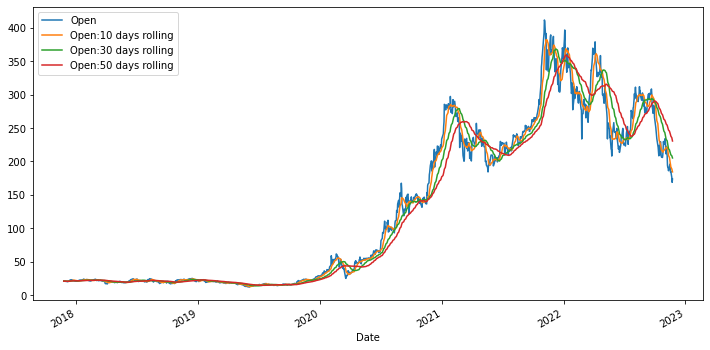

In [12]:
df_tsla[['Open', 'Open:10 days rolling','Open:30 days rolling','Open:50 days rolling' ]].plot(figsize = (12,6))

<AxesSubplot:xlabel='Date'>

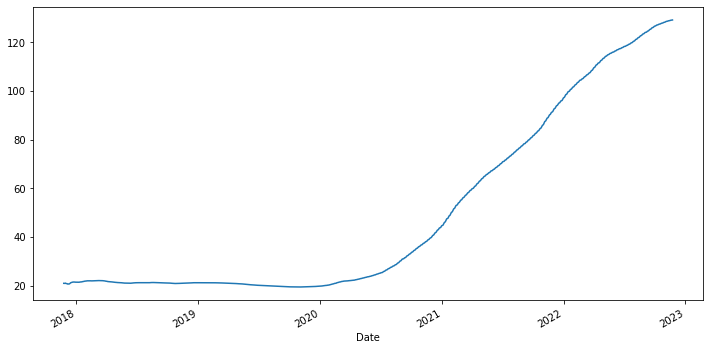

In [14]:
## expanding - cma
#cummulative moving average

df_tsla['Open'].expanding().mean().plot(figsize = (12,6))

In [ ]:
## EWMA- Exponential weighted moving average

## focus is more on the recent data
 

In [16]:
# 1. EXPONENTIAL MOVING AVERAGE (EMA)
# alpha = smoothening factor 

df_tsla['ema_open_0.1'] = df_tsla['Open'].ewm(alpha =0.1, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

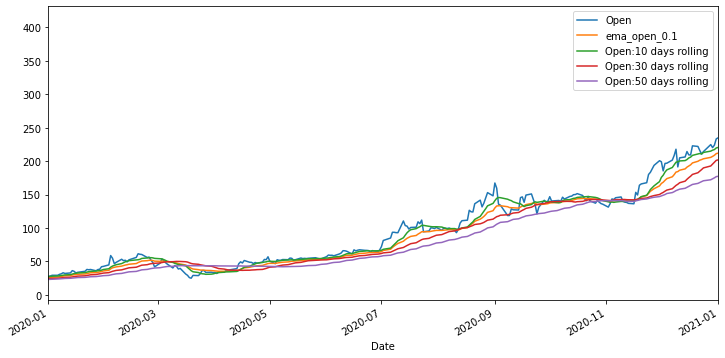

In [26]:
df_tsla[['Open', 'ema_open_0.1', 'Open:10 days rolling', 'Open:30 days rolling', 'Open:50 days rolling']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize = (12,6))

In [27]:
df_tsla['ema_open_0.3'] = df_tsla['Open'].ewm(alpha =0.3, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

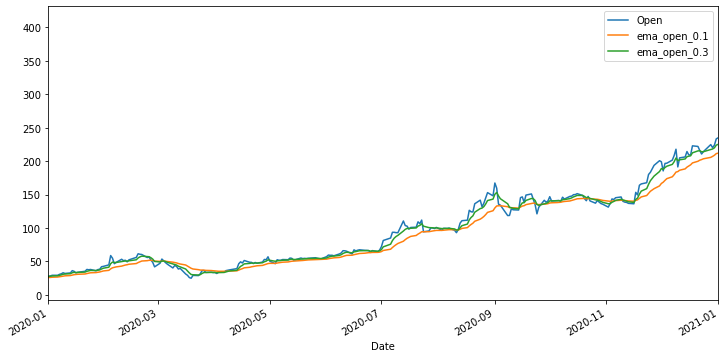

In [28]:
df_tsla[['Open', 'ema_open_0.1', 'ema_open_0.3' ]].plot(xlim = ['2020-01-01', '2021-01-01'], figsize = (12,6))

In [32]:
## Exponential weighted moving average  EWMA
## alpha = 2/(span+1)
## where, alpha = smoothening factor 

df_tsla['ewma_10days'] = df_tsla['Open'].ewm(span =10, adjust = False).mean()

<AxesSubplot:xlabel='Date'>

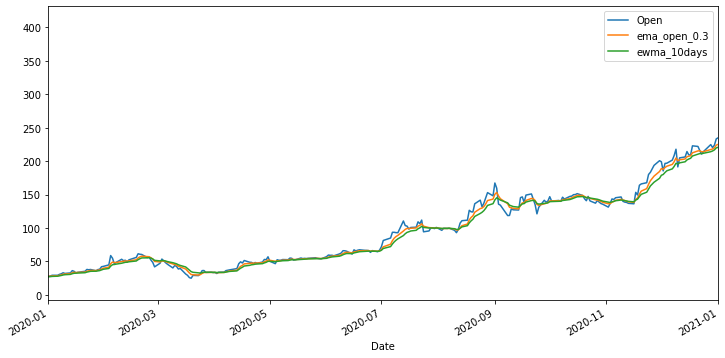

In [33]:
df_tsla[['Open', 'ema_open_0.3' , 'ewma_10days']].plot(xlim = ['2020-01-01', '2021-01-01'], figsize = (12,6))

In [ ]:
#which moving average is best- ewma
 